In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
import sklearn as sk
import copy
from scipy import stats
import statsmodels.api as sm

print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Sklearn: ", sk.__version__)

Pandas:  1.3.4
Numpy:  1.20.3
Sklearn:  1.1.1


In [3]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Understanding Regression techniques using 'Housing Price' data

In this notebook we will try to understand how to see the data and try to best predict "Housing price" using basic regression techniques. We will try to back the steps taken on mathematical grounds too (**This is mostly for my learning!!)**

# Cleaning & Undestanding the Data

## Data description
- **MSSubClass:** Identifies the type of dwelling involved in the sale.
- **MSZoning:** Identifies the general zoning classification of the sale.
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access to property
- **Alley:** Type of alley access to property
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
.
.
.

...


It's impossible to name them all, there are 81 columns!!

## Instead let me predict which 7 of the features I think would be the most useful and see how many I get right. 

**My Predictions-** 
- MSSubClass:  Identifies the type of dwelling involved in the sale
- MSZoning: Identifies the general zoning classification of the sale
- Neighborhood: Physical locations within Ames city limits
- 1stFlrSF: First floor square feet
- 2ndFlrSF: Second floor square feet
- OverallQual: Rates the overall material and finish of the house
- YearBuilt: Year built

### We first load the data

In [4]:
#Test data and Train data
train_df= pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')
target_df= pd.read_csv('sample_submission.csv')

In [5]:
target_df['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [6]:
training_full_df= test_df

In [7]:
training_full_df['SalePrice']= target_df['SalePrice']

In [8]:
training_full_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      6   2010        WD         Normal  169277.052498  
1      6   2010        WD         Normal  187758.393989  
2      3   2010        WD         Normal  183583.683570  
3      6   2010        WD         Normal  179317.477511  
4      1   2010        WD         Normal  150730.079977  

[5 rows x 81 columns]

In [9]:
train_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [10]:
test_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     500   
7         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      6   2010        WD         Normal  169277.052498  
1      6   2010        WD         Normal  187758.393989  
2      3   2010        WD         Normal  183583.683570  
3      6   2010        WD         Normal  179317.477511  
4      1   2010        WD         Normal  150730.079977  
5      4   2010        WD         Normal  177150.989247  
6      3   2010        WD         Normal  172070.659229  
7      5   2010        WD         Normal  175110.956520  
8      2   2010        WD         Normal  162011.698832  
9      4   2010        WD         Normal  160726.247831  

[10 rows x 81 columns]

In [11]:
print(f"shape of train_df: {train_df.shape} \nshape of test_df: {test_df.shape} ")

shape of train_df: (1460, 81) 
shape of test_df: (1459, 81) 


### Searching nan values and cleaning the data

Handling missing values:- https://www.kaggle.com/code/dansbecker/handling-missing-values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


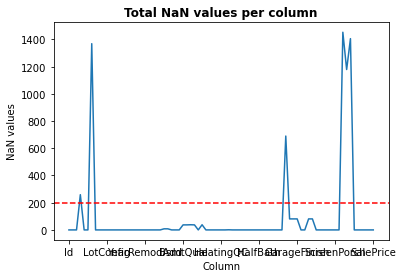

In [12]:
print(train_df.isna().sum())
train_df.isna().sum().plot()
plt.xlabel('Column')
plt.ylabel('NaN values')
plt.title("Total NaN values per column", weight= 'bold')
plt.axhline(y=200, color='r', linestyle='--')   #D

**Visualizing all columns more than 100 row values missing**
- Visually we can see there are only few fratures with more than 100 entries missing.
- There are total 19 columns with at least 1 value missing.
- `MiscFeature`, `Fence`, `PoolQC`, `FireplaceQu`, `Alley`, `LotFrontage`: These 6 features have more than 200 entries missing.
- Since these columns have too many values missing, we will delete them.
- 81 houses have no garage.

In [13]:
#Function to store columns which has NaN values

def missing_colms(dataframe):
    df_missing_colms= []
    df_missing_colms_name= []
    n= len(dataframe.isna().sum())
    for i in range(n):
        if (dataframe.isna().sum()[i] > 0):
            df_missing_colms= np.append(df_missing_colms,  dataframe.isna().sum()[i])
            df_missing_colms_name= np.append(df_missing_colms_name, dataframe.columns[i])
    return df_missing_colms, df_missing_colms_name

In [14]:
test_df_missing_colms, test_df_missing_colms_name= missing_colms(training_full_df)

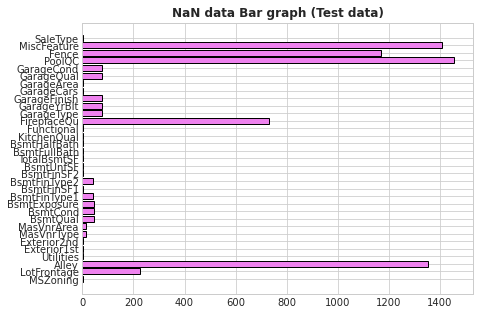

In [15]:
with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize= (7,5))
    plt.barh(test_df_missing_colms_name, test_df_missing_colms, color= 'violet', edgecolor= 'k')
    plt.title("NaN data Bar graph (Test data)", weight= 'bold')

In [16]:
training_full_df =training_full_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage', 'Alley'], axis=1)

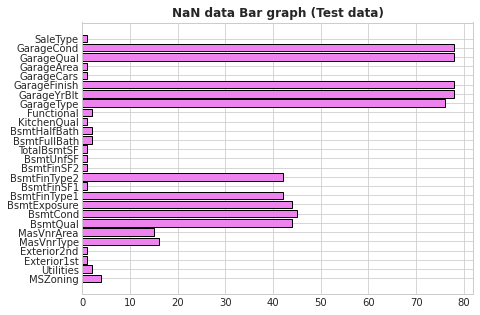

In [17]:
test_df_missing_colms, test_df_missing_colms_name= missing_colms(training_full_df)

with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize= (7,5))
    plt.barh(test_df_missing_colms_name, test_df_missing_colms, color= 'violet', edgecolor= 'k')
    plt.title("NaN data Bar graph (Test data)", weight= 'bold')

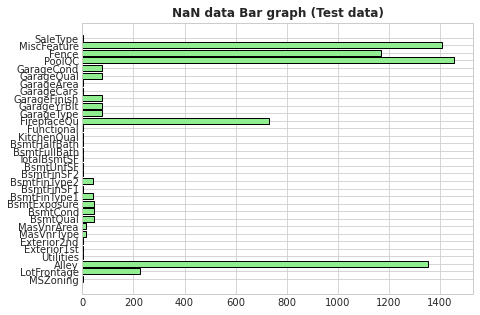

In [18]:
test_df_missing_columns=[]
test_df_missing_colms_name= []
len(test_df.isna().sum())
for i in range(len(test_df.isna().sum())):
    if (test_df.isna().sum()[i] > 0):
        test_df_missing_columns= np.append(test_df_missing_columns,  test_df.isna().sum()[i])
        test_df_missing_colms_name= np.append(test_df_missing_colms_name, test_df.columns[i])
        
with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize= (7,5))
    plt.barh(test_df_missing_colms_name, test_df_missing_columns, color= 'lightgreen', edgecolor= 'k')
    plt.title("NaN data Bar graph (Test data)", weight= 'bold')

In [19]:
training_full_df.isnull().sum().sum()

658

In [20]:
training_full_df[['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']]= training_full_df[['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']].fillna("NG")


In [21]:
training_full_df.isnull().sum().sum()

348

In [22]:
training_full_df['GarageYrBlt']= training_full_df['GarageYrBlt'].fillna(training_full_df['GarageYrBlt'].mean())

In [23]:
training_full_df.isna().sum().sum()

270

In [24]:
#Drops all rows with any NA value
training_full_df = training_full_df.dropna(how='any',axis=0) 

In [25]:
training_full_df.isna().sum().sum()

0

### The test data has now no null values (yesss!!)
Now we will remove null values from train data

In [26]:
test_df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().sum()

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
dtype: int64

In [27]:
test_df[train_df_missing_colms_name].dtypes

NameError: name 'train_df_missing_colms_name' is not defined

In [28]:
test_df= test_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage', 'Alley'], axis=1)

In [29]:
test_df.shape

(1459, 75)

In [30]:
test_df.isna().sum().sum()

658

In [31]:
test_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 75, dtype: object

Missing column Data
 [2.590e+02 1.369e+03 8.000e+00 8.000e+00 3.700e+01 3.700e+01 3.800e+01
 3.700e+01 3.800e+01 1.000e+00 6.900e+02 8.100e+01 8.100e+01 8.100e+01
 8.100e+01 8.100e+01 1.453e+03 1.179e+03 1.406e+03] 

 Missing column Name
 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


Text(0.5, 1.0, 'NaN data Bar graph (Train data)')

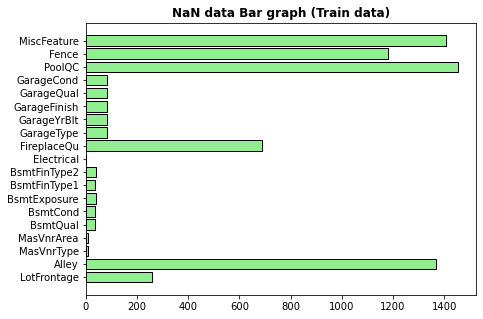

In [32]:
#Columns with At least 1 NaN value
train_df.isna().sum()
train_df_missing_colms= []
train_df_missing_colms_name= []
for i in range(len(train_df.isna().sum())):
    if (train_df.isna().sum()[i] > 0):
        train_df_missing_colms= np.append(train_df_missing_colms, train_df.isna().sum()[i])
        train_df_missing_colms_name= np.append(train_df_missing_colms_name, train_df.columns[i])
print('Missing column Data\n',train_df_missing_colms,'\n\n', 'Missing column Name\n', train_df_missing_colms_name)

plt.figure(figsize= (7,5))
plt.barh(train_df_missing_colms_name, train_df_missing_colms, color= 'lightgreen', edgecolor= 'k')
plt.title("NaN data Bar graph (Train data)", weight= 'bold')

In [33]:
#Deleting the 6 columns
train_df= train_df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage', 'Alley'], axis=1)
train_df.shape

(1460, 75)

In [34]:
train_df['GarageQual'].isna().loc

In [35]:
print(len(train_df_missing_colms))
len(train_df_missing_colms_name)

19


19

In [36]:
aa= []
np.append(aa,3)


array([3.])

In [37]:
train_df.loc[train_df['YearBuilt'] >2000]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1444  1445          20       RL     8500   Pave      Reg         Lvl   
1451  1452          20       RL     9262   Pave      Reg         Lvl   
1452  1453         180       RM     3675   Pave      Reg         Lvl   
1453  1454          20       RL    17217   Pave      Reg         Lvl   
1454  1455          20       FV     7500   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
6       AllPub    Inside       Gtl  ...             0         0           0   
11      AllPub    Inside       Gtl  ...             0         0           0   
13      AllPub    Inside       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1444    AllPub       FR2       Gtl  ...             0         0           0   
1451    AllPub    Inside       Gtl  ...             0         0           0   
1452    AllPub    Inside       Gtl  ...             0         0           0   
1453    AllPub    Inside       Gtl  ...             0         0           0   
1454    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
2           0       0       9    2008        WD         Normal    223500  
6           0       0       8    2007        WD         Normal    307000  
11          0       0       7    2006       New        Partial    345000  
13          0       0       8    2007       New        Partial    279500  
...       ...     ...     ...     ...       ...            ...       ...  
1444        0       0      11    2007        WD         Normal    179600  
1451        0       0       5    2009       New        Partial    287090  
1452        0       0       5    2006        WD         Normal    145000  
1453        0       0       7    2006        WD        Abnorml     84500  
1454        0       0      10    2009        WD         Normal    185000  

[364 rows x 75 columns]

### All NaN values from Garage related columns comes from the same datas.
We can chose to delete those datas, we will lose 5% of the data if we delete them

In [38]:
# Indeces with GarbageYrBlt as NaN
GarageYrBlt_dropIndex = train_df.isnull().loc[train_df.isnull()['GarageYrBlt'] == True].index
GarageYrBlt_dropIndex

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [39]:
train_df_temp1 = train_df.drop(GarageYrBlt_dropIndex)
train_df_temp1.isnull().loc[train_df_temp1.isnull()['GarageYrBlt'] == True]
#train_df_temp1.shape

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

In [40]:
train_df= train_df_temp1
train_df.shape

train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinType2    31
dtype: int64

In [41]:
train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].nunique()

BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
dtype: int64

Nan represents **NO BASEMENT**. We can create a new Category named 'NB'- representing no basement in place of NaN.

In [42]:
train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].apply(lambda col: col.unique())

BsmtQual                      [Gd, TA, Ex, nan, Fa]
BsmtCond                      [TA, Gd, nan, Fa, Po]
BsmtExposure                  [No, Gd, Mn, Av, nan]
BsmtFinType1    [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
BsmtFinType2    [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
dtype: object

In [43]:
train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NB')


BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
0          Gd       TA           No          GLQ          Unf
1          Gd       TA           Gd          ALQ          Unf
2          Gd       TA           Mn          GLQ          Unf
3          TA       Gd           No          ALQ          Unf
4          Gd       TA           Av          GLQ          Unf
...       ...      ...          ...          ...          ...
1455       Gd       TA           No          Unf          Unf
1456       Gd       TA           No          ALQ          Rec
1457       TA       Gd           No          GLQ          Unf
1458       TA       TA           Mn          GLQ          Rec
1459       TA       TA           No          BLQ          LwQ

[1379 rows x 5 columns]

In [44]:
train_df['BsmtQual'].isnull().sum()

30

In [45]:
train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]= train_df[['BsmtQual', 'BsmtCond',
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NB')
train_df
train_df.loc[train_df['BsmtQual'] == 'NB']['BsmtQual'].shape

(30,)

In [46]:
train_df.isna().sum().sum()

17

In [47]:
# 
train_df = train_df.dropna(how='any',axis=0) 

In [48]:
train_df.isna().sum().sum()

0

In [49]:
train_df.shape

(1370, 75)

**No NaN. values left in Train data either**

Now that NaN values have been taken care of lets study the data distributions and outliers

# Data distributions and Outliers

First we will see the correlations between the features and the output and try to understand which features influences the output the most. Understanding so many features at the same time is not possible, thus we will only try to understand the features which have higher influence on the sale output!

In [50]:
train_df.describe().T

count           mean           std      min        25%  \
Id             1370.0     730.696350    421.194850      1.0     365.25   
MSSubClass     1370.0      56.054745     41.073531     20.0      20.00   
LotArea        1370.0   10687.435036  10228.507006   1300.0    7731.00   
OverallQual    1370.0       6.181752      1.344236      2.0       5.00   
OverallCond    1370.0       5.582482      1.081480      2.0       5.00   
YearBuilt      1370.0    1972.783942     29.371056   1880.0    1955.00   
YearRemodAdd   1370.0    1985.327007     20.452934   1950.0    1967.25   
MasVnrArea     1370.0     109.076642    184.589326      0.0       0.00   
BsmtFinSF1     1370.0     454.211679    458.985739      0.0       0.00   
BsmtFinSF2     1370.0      48.418248    164.817484      0.0       0.00   
BsmtUnfSF      1370.0     570.742336    444.050989      0.0     225.50   
TotalBsmtSF    1370.0    1073.372263    435.558797      0.0     808.50   
1stFlrSF       1370.0    1176.086131    385.381717    438.0     894.00   
2ndFlrSF       1370.0     353.202190    439.497524      0.0       0.00   
LowQualFinSF   1370.0       4.162044     40.260837      0.0       0.00   
GrLivArea      1370.0    1533.450365    519.489200    438.0    1152.00   
BsmtFullBath   1370.0       0.429197      0.513963      0.0       0.00   
BsmtHalfBath   1370.0       0.059124      0.239019      0.0       0.00   
FullBath       1370.0       1.577372      0.547455      0.0       1.00   
HalfBath       1370.0       0.394161      0.502116      0.0       0.00   
BedroomAbvGr   1370.0       2.865693      0.782985      0.0       2.00   
KitchenAbvGr   1370.0       1.037956      0.194944      1.0       1.00   
TotRmsAbvGrd   1370.0       6.551825      1.590884      3.0       5.00   
Fireplaces     1370.0       0.641606      0.644711      0.0       0.00   
GarageYrBlt    1370.0    1978.353285     24.685798   1900.0    1961.00   
GarageCars     1370.0       1.869343      0.631307      1.0       1.00   
GarageArea     1370.0     500.462774    185.988074    160.0     377.50   
WoodDeckSF     1370.0      97.656204    126.805998      0.0       0.00   
OpenPorchSF    1370.0      47.028467     64.995049      0.0       0.00   
EnclosedPorch  1370.0      21.031387     60.519492      0.0       0.00   
3SsnPorch      1370.0       3.633577     30.252215      0.0       0.00   
ScreenPorch    1370.0      16.050365     57.422820      0.0       0.00   
PoolArea       1370.0       2.940146     41.470515      0.0       0.00   
MiscVal        1370.0      43.170803    503.247977      0.0       0.00   
MoSold         1370.0       6.331387      2.693166      1.0       5.00   
YrSold         1370.0    2007.811679      1.331589   2006.0    2007.00   
SalePrice      1370.0  185194.797080  78899.705642  35311.0  133925.00   

                    50%        75%       max  
Id                732.5    1093.75    1460.0  
MSSubClass         50.0      70.00     190.0  
LotArea          9591.0   11712.75  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1975.0    2001.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     171.75    1600.0  
BsmtFinSF1        399.5     728.00    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     811.00    2336.0  
TotalBsmtSF      1008.0    1314.00    6110.0  
1stFlrSF         1098.0    1414.00    4692.0  
2ndFlrSF            0.0     737.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1479.0    1788.00    5642.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       6.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      12.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1979.5    2

In [51]:
print("Categorical features: ", train_df.loc[:,train_df.dtypes==object].columns.shape[0])
print("Integer features: ", train_df.loc[:,train_df.dtypes==int].columns.shape[0])
print("Float features: ", train_df.loc[:,train_df.dtypes==float].columns.shape[0])
print("\nTotal:-- ", 75)

Categorical features:  38
Integer features:  35
Float features:  2

Total:--  75


In [52]:
cat_columns= train_df.loc[:,train_df.dtypes== object].columns
int_columns= train_df.loc[:,train_df.dtypes==int].columns
float_columns= train_df.loc[:,train_df.dtypes==float].columns

In [53]:
cat_columns
int_columns
float_columns
numeric_columns= np.append(int_columns, float_columns)

In [54]:
numeric_columns

array(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'MasVnrArea', 'GarageYrBlt'], dtype=object)

## Correlations

From the correlation plot below we can conclude the following things

- The most relevant line is the last line which shows the correlation between the target and the features. From this we can see Overall Quality is most highly correlated with the sale price. This means Overall Quality of the house is the biggest contributor on determining the price of the house. This is followed by Ground floor living area.
- `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `MoSold`, `YrSold`, `ID`, `MSSubClass` have little to no correlation with Sale Price or any other features.
- Garage Area and Garage Cars are highy correlated: The more cars you have the larger garage you'll need :)
- Total Basement Area and 1st Floor Living Area are highly correlated too, I belive this is because if you have larger plot area the larger basement you can build. So the general trend is if people have space available to build basement, theey build it.

Text(0.5, 1.0, 'Correlation Plot')

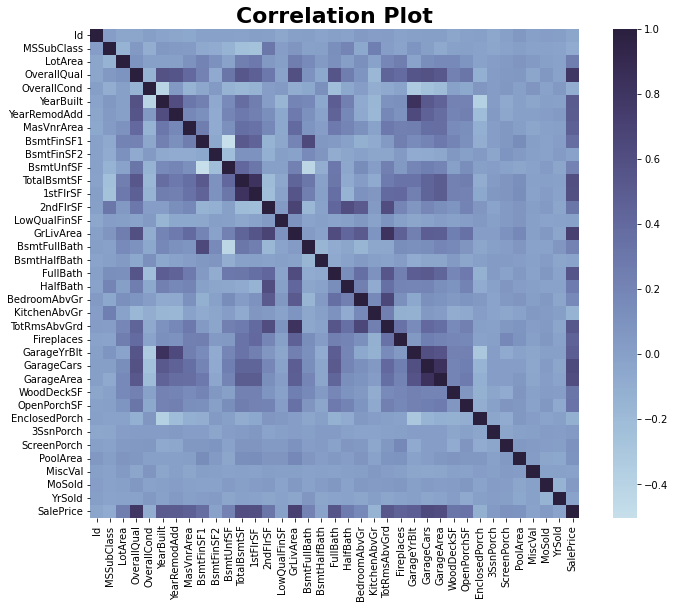

In [55]:
corr = train_df.corr()
corr
f, ax = plt.subplots(figsize=(12, 9))
cmap= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot", weight= 'bold', size= 22)

In [56]:
corr10_columns=[]
high_corr_index=[]
for i in numeric_columns:
    if abs(corr[i][36]) > 0.1:
        #print(i, '\t:', corr[i][36])
        corr10_columns= np.append(corr10_columns, i)
corr10_columns.shape

(26,)

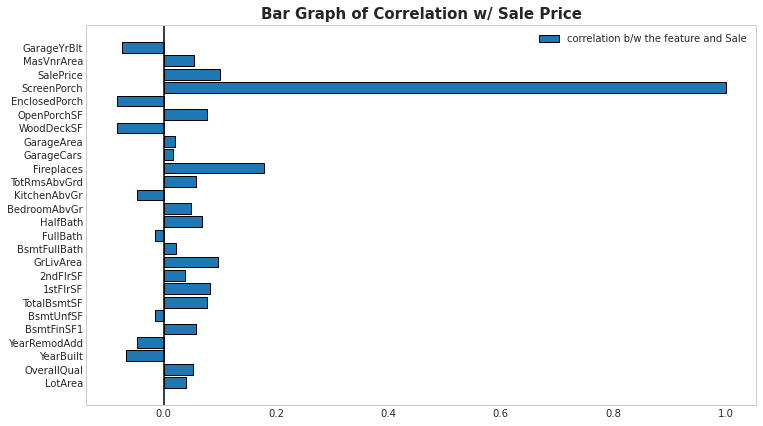

In [57]:
corr10= train_df[corr10_columns].corr()
corr10.iloc[22]
plt.figure(figsize=(12,7))

with plt.style.context(('seaborn-whitegrid')):
    plt.barh(corr10_columns, corr10.iloc[22], edgecolor= 'k', color= 'tab:blue', label= 'correlation b/w the feature and Sale')
    plt.axvline(x = 0, color= 'k')
    plt.grid()
    plt.legend()
    plt.title("Bar Graph of Correlation w/ Sale Price", weight= 'bold', size= 15)

In [58]:
plt.style.use('ggplot')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


**These are columns with more than 0.4 correlation with the target random variable- Sale Price**

In [59]:
# only storing values which has more than 0.4 correlation
corr40_columns=[]
for i in numeric_columns:
    if abs(corr[i][36]) > 0.4:
        #print(i, '\t:', corr[i][36])
        corr40_columns= np.append(corr40_columns, i)
corr40_columns

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'MasVnrArea',
       'GarageYrBlt'], dtype='<U32')

### These were only the numeric value features, now lets try to understand how the categorical valued features affect the sales

The categorical valued columns are the following

In [60]:
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:>

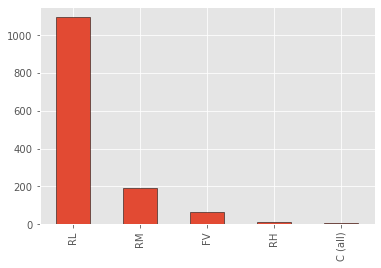

In [61]:
train_df['MSZoning'].value_counts().plot(kind='bar', edgecolor= 'k')

In [62]:
MSZoning_group= train_df.groupby('MSZoning')
MSZoning_group.describe()["SalePrice"]['count']

MSZoning
C (all)       8.0
FV           62.0
RH           12.0
RL         1095.0
RM          193.0
Name: count, dtype: float64

In [63]:
train_df.groupby('MSZoning').describe()["LotArea"]['mean']

MSZoning
C (all)     9833.000000
FV          6572.387097
RH          7275.666667
RL         11689.158904
RM          6573.559585
Name: mean, dtype: float64

In [64]:
train_df.groupby('MSZoning').describe()

Id                                                        \
           count        mean         std    min    25%    50%      75%   
MSZoning                                                                 
C (all)      8.0  683.375000  440.810273   31.0  442.0  762.5   953.25   
FV          62.0  699.258065  409.157188   48.0  379.0  666.0   986.50   
RH          12.0  794.833333  289.635455  342.0  640.0  810.0   953.00   
RL        1095.0  738.405479  419.684686    1.0  372.5  750.0  1100.50   
RM         193.0  695.031088  440.416161    9.0  315.0  631.0  1099.00   

                 MSSubClass             ...  YrSold         SalePrice  \
             max      count       mean  ...     75%     max     count   
MSZoning                                ...                             
C (all)   1280.0        8.0  60.000000  ...  2010.0  2010.0       8.0   
FV        1455.0       62.0  91.612903  ...  2009.0  2010.0      62.0   
RH        1265.0       12.0  67.083333  ...  2009.0  2009.0      12.0   
RL        1460.0     1095.0  49.063927  ...  2009.0  2010.0    1095.0   
RM        1453.0      193.0  83.445596  ...  2009.0  2010.0     193.0   

                                                                      \
                   mean           std       min        25%       50%   
MSZoning                                                               
C (all)    78172.500000  34826.592664   35311.0   51994.75   74700.0   
FV        214888.129032  53437.371453  144152.0  173799.75  207900.0   
RH        127994.500000  31220.718635   76000.0  106150.00  136500.0   
RL        194451.347032  80148.091729   58500.0  140000.00  176000.0   
RM        131130.927461  48830.087320   66500.0  107000.00  125000.0   

                              
               75%       max  
MSZoning                      
C (all)   104082.0  133900.0  
FV        250000.0  370878.0  
RH        145000.0  181000.0  
RL        227000.0  755000.0  
RM        143000.0  475000.0  

[5 rows x 296 columns]

In [65]:
train_df.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     78172.500000
FV         214888.129032
RH         127994.500000
RL         194451.347032
RM         131130.927461
Name: SalePrice, dtype: float64

In [66]:
train_df.groupby('MSZoning').median()['SalePrice'].index

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

<ErrorbarContainer object of 3 artists>

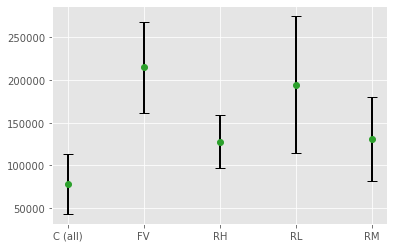

In [74]:
meeaan= train_df.groupby('MSZoning')['SalePrice'].mean()
std_dev= train_df.groupby('MSZoning')['SalePrice'].agg('std')
indx= train_df.groupby('MSZoning').median()['SalePrice'].index


plt.errorbar(indx, meeaan, yerr= std_dev, fmt='o', ecolor= 'k', color= 'tab:green', capsize= 5, elinewidth= 2)

In [75]:
train_df.describe()["SalePrice"]

count      1370.000000
mean     185194.797080
std       78899.705642
min       35311.000000
25%      133925.000000
50%      167000.000000
75%      217875.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [76]:
train_df.shape

(1370, 75)

In [77]:
200/1400

0.14285714285714285

In [78]:
numeric_columns

array(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'MasVnrArea', 'GarageYrBlt'], dtype=object)

# How to interpret the graphs below?

- The 1st graph in each row represents the distribution of each possible value in column 'A'. And the 2nd graph shows Sale Price mean value and the standard deviation for each possible value in column 'A'.
- We have to make judgement based on looking at both, which feature might be importnt.
- In the 1st row is for 'MSZoning' column (Identifies the general zoning classification of the house ). There are only few 'Commertial blocks' (C (all)), 'Floating Village residential' (FV) and 'High Density Residential blocks' (RH). We can see most of the people dwell in 'Low Density residential area' (RL) or 'Medium Density residential area' (RM).
- The average sale price is the highest for FV- Floating Village followed by RL- Low Density residential. But the sample size for FL is too low to say anything conclusive. Bt sicnce sample size of RL and RM are large enough, we can form a hypothesis that 'the average sale price of residents of low density residential area is higher than the medium density residential area'.
- Looking at the graphs, the features I think will play more influential role in determining the Sale Price are: `MSZoning`, `LotShape`, `Neighborhood`, `ExterQual`, `BsmtQual`, `KitchenQual`, `GarageFinish`, `SaleCondition`, `HouseStyle`, `Foundation`.
- We will check out whether my predictions are right while doing Linear regression modelling and predictions.

# Hypothesis Testing
**The average sale price of residents of low density residential area (RL) is higher than the medium density residential area (RM) for the feature- MSZoning.**

$H_0$: **Null Hypothesis**- The average sale price of residents of low density residential area (RL) is same as the medium density residential area (RM).

$H_a$: **Alternative Hypothesis**- The average sale price of residents of low density residential area (RL) is higher than the medium density residential area (RM).

If we assume no matter what is the outcome of MSZoning variable (either Low Density Zone- RL or Medium Density Zone- RM), the underlying distribution od SalePrice remains the same. This is the assumption under Null Hypothesis. Whether the outcome is Low density area or Medium density area, the density function of total sales is the same. Here in the graph below we can see this as the black line, which looks like some Gamma function.

Assuming that Model is true we see what is the probability of getting the data we got (see Graph below). The Sales distribution has mean at $185479$, so what is the probability that randomly picking `193` samples we get `11` which have values lesser than the distribution mean? it's very low! The p-value for this case is about $ 10^{-41}$ ($\leq 0.05$ ;) **so we can reject Null Hypothesis with HIGH CONFIDENCE** and say that a resident with an average house in a 'low density residential area (RL)' can expect to sell their house at a higher price than an average resident in 'Medium density residential area (RL)' and possibly 'Low density area' even if you have the same type of house (the location plays a big part in determining sale value).

**With some Statisistics and under some asumptions we are able to conclusively say that we are confident with the hypothesis. If we are jobless enough we can make such hypotheses at every feature and try to see.**

Total Medium Density Housing= 193
Total Medium Density Housing with 
> $185479 (mean) Sale Price= 11


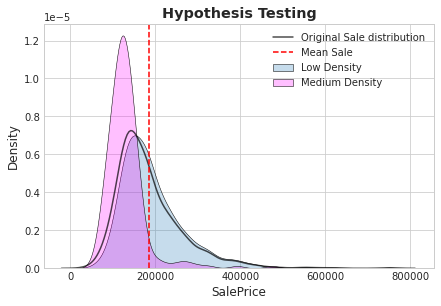

In [79]:
low_density_sales= train_df[train_df['MSZoning'] == 'RL']
medium_density_sales= train_df[train_df['MSZoning'] == 'RM']
#plt.hist(train_df['SalePrice'], bins= 40, alpha=0.2, edgecolor= 'k')
print('Total Medium Density Housing=', medium_density_sales.shape[0])
print('Total Medium Density Housing with \n> $185479 (mean) Sale Price=', medium_density_sales[medium_density_sales["SalePrice"] > 185479].shape[0])
with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize=(7,4.5))
    sns.kdeplot(train_df['SalePrice'], color= 'k', alpha= 0.7, label= 'Original Sale distribution')
    plt.axvline(x = 185479, color = 'r',  linestyle = '--', label= 'Mean Sale')
    sns.kdeplot(low_density_sales['SalePrice'], color= 'tab:blue', fill= True, label= 'Low Density', edgecolor= 'k')
    sns.kdeplot(medium_density_sales['SalePrice'], color= 'magenta', fill= True, label= 'Medium Density', edgecolor= 'k')
    plt.legend()
    plt.title("Hypothesis Testing", weight= 'bold')

### Graphs below

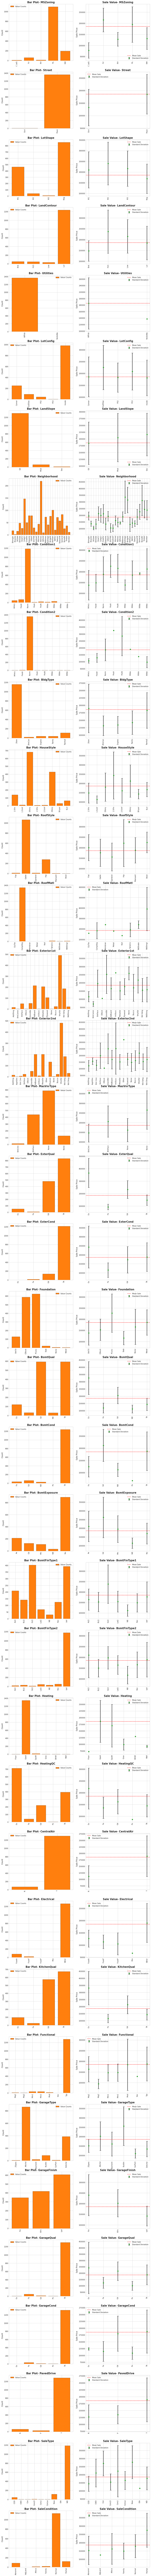

In [102]:
indeces=[]
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots(38,2, figsize= (15,280))
    i=0
    for col in cat_columns:
            train_df.groupby(col).describe()["SalePrice"]['mean']
            indeces= train_df.groupby(col).median()['SalePrice'].index
            count= train_df.groupby(col).describe()["SalePrice"]['count']
            mean= train_df.groupby(col)['SalePrice'].mean()
            std_dev= train_df.groupby(col)['SalePrice'].agg('std')
            ax[i][0].bar(indeces, count, edgecolor= 'k', label= 'Value Counts', color= 'tab:orange')
            ax[i][0].set_ylabel("Count")
            ax[i][0].set_title(f'Bar Plot- {col}', weight= 'bold', size= 15)
            ax[i][0].xaxis.set_ticks(indeces)
            ax[i][0].set_xticklabels(indeces, rotation=90)
            ax[i][0].legend()

            ax[i][1].errorbar(indeces, mean, yerr= std_dev, fmt='o', ecolor= 'k', color= 'tab:green', capsize= 5, elinewidth= 2, label= 'Standard Deviation')
            ax[i][1].axhline(y = 185479, color = 'r', linestyle = '--', label= 'Mean Sale')
            ax[i][1].set_ylabel("Sale Price")
            ax[i][1].set_title(f'Sale Value- {col}', weight= 'bold', size= 15)
            ax[i][1].xaxis.set_ticks(indeces)
            ax[i][1].set_xticklabels(indeces, rotation=90)
            ax[i][1].legend()

            i= i+1
        #print(train_df.groupby(col).describe()["SalePrice"]['mean'])
        #print(indeces,'\n\n')

# Outlier Detection
- We are only chekicking for outliers of features which have higher correlations ( > 0.4) with the Sale Price since studying all the features is not feasable.
- Looking at the graphs below, we cannot say that any of the data is conclusively an outlier (Other than a few in 'total basement square feet- TotalBsmtSF' column (ignore it)).

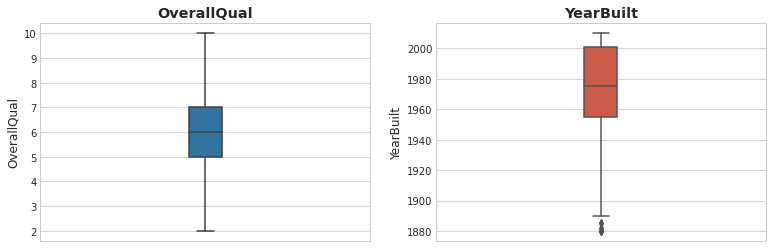

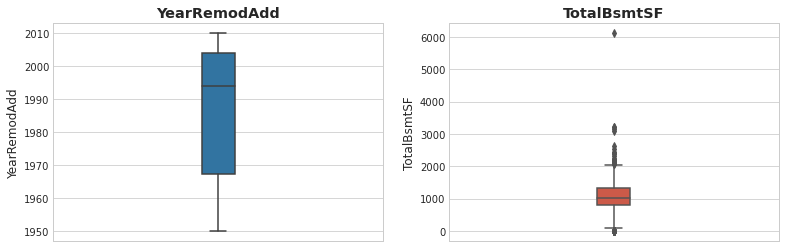

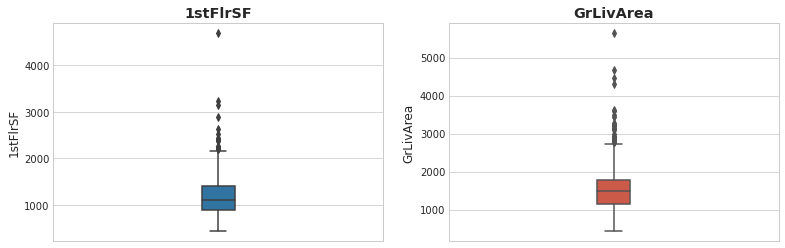

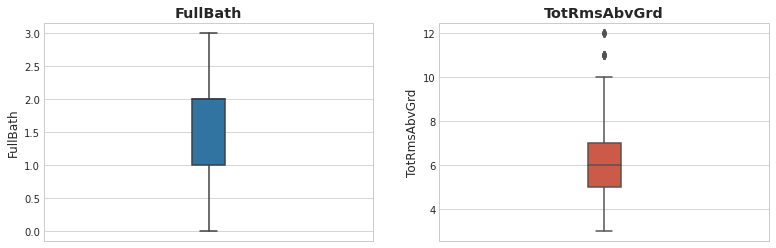

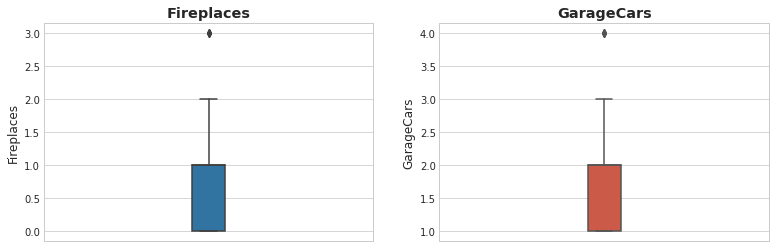

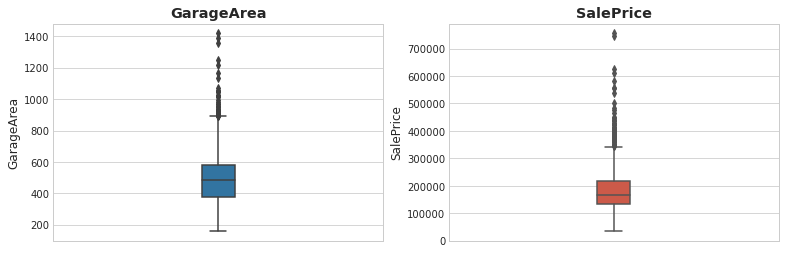

In [103]:
for i in range(6):
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots(1,2, figsize= (13,4))
        ax[0]= sns.boxplot(y=corr40_columns[2*i], data= train_df[corr40_columns], width= 0.1, ax= ax[0], color= 'tab:blue')
        ax[0].set_title(f"{corr40_columns[2*i]}", weight= 'bold')
        ax[1]= sns.boxplot(y=corr40_columns[2*i+1], data= train_df[corr40_columns], width= 0.1, ax= ax[1])
        ax[1].set_title(f"{corr40_columns[2*i+1]}", weight= 'bold')

In [104]:
#Important columns/features according to me
imp_cat_columns= ['MSZoning','LotShape', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'SaleCondition', 'HouseStyle', 'Foundation']

#This has more qualittive features of the house
other_cat_columns= ['Street', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'BsmtExposure', 'BsmtCond', 'GarageFinish', 'SaleCondition']


In [105]:
train_df[other_cat_columns]

Street LandContour LandSlope Condition1 Condition2 BldgType BsmtExposure  \
0      Pave         Lvl       Gtl       Norm       Norm     1Fam           No   
1      Pave         Lvl       Gtl      Feedr       Norm     1Fam           Gd   
2      Pave         Lvl       Gtl       Norm       Norm     1Fam           Mn   
3      Pave         Lvl       Gtl       Norm       Norm     1Fam           No   
4      Pave         Lvl       Gtl       Norm       Norm     1Fam           Av   
...     ...         ...       ...        ...        ...      ...          ...   
1455   Pave         Lvl       Gtl       Norm       Norm     1Fam           No   
1456   Pave         Lvl       Gtl       Norm       Norm     1Fam           No   
1457   Pave         Lvl       Gtl       Norm       Norm     1Fam           No   
1458   Pave         Lvl       Gtl       Norm       Norm     1Fam           Mn   
1459   Pave         Lvl       Gtl       Norm       Norm     1Fam           No   

     BsmtCond GarageFinish SaleCondition  
0          TA          RFn        Normal  
1          TA          RFn        Normal  
2          TA          RFn        Normal  
3          Gd          Unf       Abnorml  
4          TA          RFn        Normal  
...       ...          ...           ...  
1455       TA          RFn        Normal  
1456       TA          Unf        Normal  
1457       Gd          RFn        Normal  
1458       TA          Unf        Normal  
1459       TA          Fin        Normal  

[1370 rows x 10 columns]

# Regression Modeling

In the modelling part we will try to see which regression technique works better and also compare which columns/features are more important, I have categorized the columns and have some predictions. From the modelling this data we'll try to see whether my predictions are right or not.

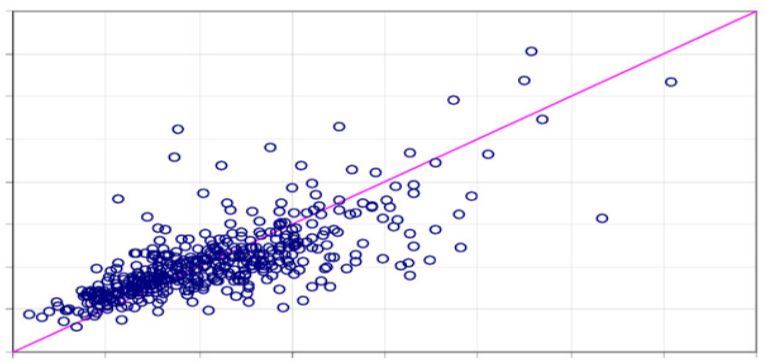

In [107]:
print(train_df.shape)
print(training_full_df.shape)

(1370, 75)
(1387, 75)


## Concatenating Train and Test data to be able to treat categorical datas. Most models cannot deal with categorical datas, so we have to convert them into binary form before we process them ( DUMMY CODING ).

Generally, a categorical variable with n levels will be transformed into n-1 variables each with two levels. These n-1 new variables contain the same information than the single variable. It is a way to make the categorical variable into a series of dichotomous variables (variables that can have a value of zero or one only.)  For all but one of the levels of the categorical variable, a new variable will be created that has a value of one for each observation at that level and zero for all others.

$$ y_j = \sum_{j}^{L-1}\beta_i\delta_{ij} + \alpha +\epsilon $$

Where, $\beta_j$ is the weight if the coefficient of the particular category in that column.

In [108]:
full_df= pd.concat([train_df, training_full_df], ignore_index= True, axis= 0)

**pd.get_dummies is used to convert categorical data type into numerical. After that we again split the data.**

In [113]:
model_df= pd.get_dummies(full_df)
print("Shape: ", model_df.shape)
model_df['GarageFinish_Fin']

Shape:  (2757, 280)


0       0
1       0
2       0
3       0
4       0
       ..
2752    0
2753    0
2754    0
2755    0
2756    1
Name: GarageFinish_Fin, Length: 2757, dtype: uint8

In [114]:
#standardizing numerical columns
#print(model_df.iloc[0:train_df.shape[0],:].shape)
scaler= StandardScaler()
model_scaled= scaler.fit(full_df[numeric_columns].iloc[0:train_df.shape[0],:])
scaled_data= copy.deepcopy(model_df)
scaled_data[numeric_columns]= model_scaled.transform(scaled_data[numeric_columns])
scaled_data['SaleType_WD'].unique()

array([1, 0], dtype=uint8)

## We will try to understand how different variations affect the accuracy of Regression Model. Here I keep track of the different variables used to study the variations in model.

- `full_df`: Full dataframe including training and test data, categories NOT turned into binary form, NOT standardized.
- `model_df`: Full dataframe including training and test data, with categories turned into binary form, NOT standardized.
- `scaled_data`: Full dataframe including training and test data, with categories turned into binary form, and standardized.
- `[imp_cat_columns]`: Categorical columns which I think would be more influential in determination of Sale Price.
- `[other_cat_columns]`: Categorical columns which I think would be less important.
- `model_2_df`: Stores full dataframe including training and test data, with categories turned into binary form (drop_first= True), NOT standardized.
- `scaled_2_data`: Full dataframe including training and test data, with categories turned into binary form (drop_first= True), and standardized.

In [172]:
#Creating Full TEST + TRAIN DataFrame to store with categories NOT turned into binary form, but standardized.

scalar= StandardScalar()

In [ ]:
regretn_std = LinearRegression()
a= regretn_std.fit(model_train_std, predict_train_std)
regretn_std.score(model_test_std, predict_test_std)

### Regression using `model_df` data, which is not standardized and has all the features

In [115]:
#Splitting data
model_train= copy.deepcopy(model_df.iloc[0:train_df.shape[0],:].loc[:, model_df.columns!='SalePrice'])
predict_train= copy.deepcopy(model_df.iloc[0:train_df.shape[0],:]["SalePrice"])
model_test= copy.deepcopy(model_df.iloc[train_df.shape[0]:,:].loc[:, model_df.columns!='SalePrice'])
predict_test= copy.deepcopy(model_df.iloc[train_df.shape[0]:,:]["SalePrice"])

print("model_train:\t", model_train.shape)
print("predict_train:\t",predict_train.shape)
print("model_test:\t",model_test.shape)
print("predict_test:\t",predict_test.shape)

model_train:	 (1370, 279)
predict_train:	 (1370,)
model_test:	 (1387, 279)
predict_test:	 (1387,)


In [116]:
regretn = LinearRegression()
a= regretn.fit(model_train, predict_train)
regretn.score(model_test, predict_test)

-134443365702.21405

In [117]:
errorr= (regretn.predict(model_test)-predict_test)/predict_test

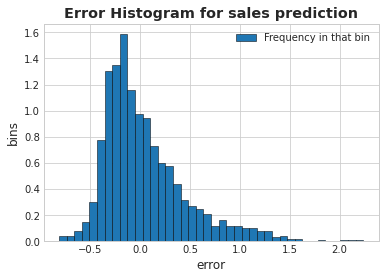

In [138]:
with plt.style.context(('seaborn-whitegrid')):
    plt.hist(err_df[err_df['SalePrice']>-1], bins=40, edgecolor= 'k', density= True, color= 'tab:blue', label='Frequency in that bin')
    plt.xlabel('error')
    plt.ylabel('bins')
    plt.legend()
    plt.title("Error Histogram for sales prediction", weight= 'bold')

<AxesSubplot:ylabel='Frequency'>

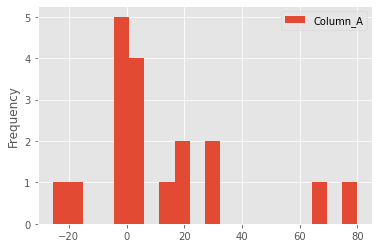

In [119]:
regretn.coef_
regression_coef_model_df= pd.DataFrame(regretn.coef_, columns = ['Column_A'])
regression_coef_model_df[abs(regression_coef_model_df['Column_A'])<100].plot.hist(bins= 20)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0., 120., 151.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-1.52062816e+13, -1.44459676e+13, -1.36856535e+13, -1.29253394e+13,
        -1.21650253e+13, -1.14047112e+13, -1.06443971e+13, -9.88408307e+12,
        -9.12376898e+12, -8.36345490e+12, -7.60314082e+12, -6.84282674e+12,
        -6.08251266e+12, -5.32219857e+12, -4.56188449e+12, -3.80157041e+12,
        -3.04125633e+12, -2.28094225e+12, -1.52062816e+12, -7.60314082e+11,
         3.42031250e+01,  7.60314082e+11,  1.52062816e+12,  2.28094225e+12,
         3.04125633e+12,  3.80157041e+12,  4.56188449e+12,  5.32219857e+12,
         6.08251266e+12,  6.84282674e+12,  7.60314082e+12,  8.36345490e+12,
         9.12376898e+12,  9.88408307e+12,  1.06443971e+13,  1.14047112e+13,
         1.21650253e+13,  1.29253394e+13, 

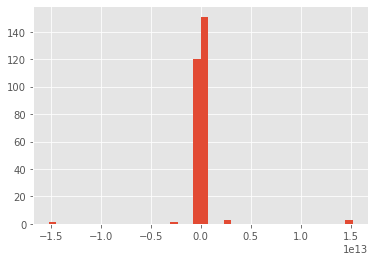

In [120]:
plt.hist(regretn.coef_, bins= 40)

### Regression using `scaled_data` data, which is standardized and has all the features

In [169]:
#Splitting standardized data into test & train
model_train_std= copy.deepcopy(scaled_data.iloc[0:train_df.shape[0],:].loc[:, scaled_data.columns!='SalePrice'])
predict_train_std= copy.deepcopy(scaled_data.iloc[0:train_df.shape[0],:]["SalePrice"])
model_test_std= copy.deepcopy(scaled_data.iloc[train_df.shape[0]:,:].loc[:, scaled_data.columns!='SalePrice'])
predict_test_std= copy.deepcopy(scaled_data.iloc[train_df.shape[0]:,:]["SalePrice"])

print("model_train_std:\t", model_train.shape)
print("predict_train_std:\t",predict_train.shape)
print("model_test_std:\t\t",model_test.shape)
print("predict_test_std:\t",predict_test.shape)

model_train_std:	 (1370, 279)
predict_train_std:	 (1370,)
model_test_std:		 (1387, 279)
predict_test_std:	 (1387,)


In [122]:
regretn_std = LinearRegression()
a= regretn_std.fit(model_train_std, predict_train_std)
regretn_std.score(model_test_std, predict_test_std)

-3.827181773349289e+20

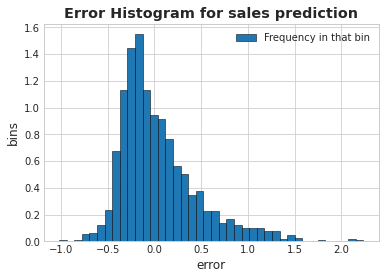

In [123]:
errr_std= (regretn_std.predict(model_test_std)-predict_test_std)/predict_test_std
errr_std
errr_std_df=errorr.to_frame() 

with plt.style.context(('seaborn-whitegrid')):
    plt.hist(errr_std_df[errr_std_df['SalePrice']>-10], bins=40, edgecolor= 'k', density= True, color= 'tab:blue', label='Frequency in that bin')
    plt.xlabel('error')
    plt.ylabel('bins')
    plt.legend()
    plt.title("Error Histogram for sales prediction", weight= 'bold')
    

<AxesSubplot:ylabel='Frequency'>

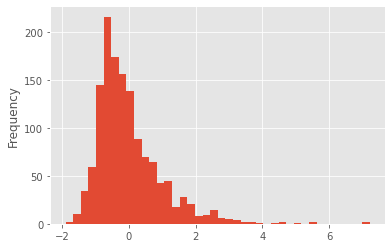

In [124]:
predict_train_std.plot.hist(bins= 40)

In [125]:
regretn_std.coef_

array([ 7.84237104e-03, -1.31008963e-02,  1.04668724e-01,  1.11915637e-01,
        8.35556137e-02,  1.16265501e-01,  1.78845493e-02,  4.51996540e-02,
        3.31871589e+11,  1.19171982e+11,  3.21072955e+11, -3.14932639e+11,
        1.63612346e+11,  1.86587007e+11,  1.70925857e+10, -2.20547170e+11,
        4.02832031e-03,  1.35040283e-03,  2.32982635e-02,  2.70462036e-03,
       -3.72568965e-02, -4.02908325e-02,  2.38113403e-02,  1.77536011e-02,
       -6.04629517e-03,  3.30657959e-02,  4.06799316e-02,  2.04620361e-02,
        1.46484375e-03,  1.58691406e-03,  1.16043091e-02,  2.03561783e-02,
        4.18319702e-02,  1.30462646e-03, -1.64947510e-02, -4.61578369e-03,
        1.75805346e+10,  1.75805346e+10,  1.75805346e+10,  1.75805346e+10,
        1.75805346e+10,  1.29429793e+10,  1.29429793e+10,  5.24556563e+10,
        5.24556563e+10,  5.24556563e+10,  5.24556563e+10, -6.52950348e+09,
       -6.52950348e+09, -6.52950348e+09, -6.52950348e+09, -1.58344075e+10,
       -1.58344075e+10,  

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   4.,   1.,  21.,  19.,  39., 124.,  40.,   3.,
          9.,   8.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-3.14932639e+11, -2.98762534e+11, -2.82592428e+11, -2.66422322e+11,
        -2.50252216e+11, -2.34082111e+11, -2.17912005e+11, -2.01741899e+11,
        -1.85571794e+11, -1.69401688e+11, -1.53231582e+11, -1.37061476e+11,
        -1.20891371e+11, -1.04721265e+11, -8.85511593e+10, -7.23810536e+10,
        -5.62109478e+10, -4.00408421e+10, -2.38707364e+10, -7.70063070e+09,
         8.46947501e+09,  2.46395807e+10,  4.08096864e+10,  5.69797922e+10,
         7.31498979e+10,  8.93200036e+10,  1.05490109e+11,  1.21660215e+11,
         1.37830321e+11,  1.54000426e+11,  1.70170532e+11,  1.86340638e+11,
         2.02510744e+11,  2.18680849e+11,  2.34850955e+11,  2.51021061e+11,
         2.67191166e+11,  2.83361272e+11, 

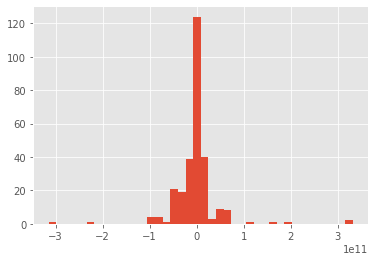

In [126]:
plt.hist(regretn_std.coef_, bins= 40)

# Comparision b/w Scaled and Un-scaled data:

- The graph of prediction %age error are almost identical, this is not what I expected. It was expected that satndardized data would give better prediction, but this is NOT the case (for this data at least). The performance was similar for both.
- But the coefficients are different in both case, it is much more easier to analyze the coefficients when the data is standardized since they are all scaled to similar magnitude. In case of un-standardized data we can see that the coefficients parameters of different features vary vastly, which makes it difficult to compare the importance of featues.
- Also scaling is very important if we want to do PCA, we want all the data to be dimensionless.

In [127]:
errorr
err_df= errorr.to_frame()
err_df[abs(err_df['SalePrice'])<0.5].shape

(1119, 1)

In [128]:
1119/err_df.shape[0]

0.8067772170151406

# -------------------------------------------------------------------------------------------

# Deploying 'Orinary Least Square Regression' model using `statsmodels` library.

### The `statsmodels` library provides some parameters using which we can check whether the data satisfies the particular assumptions the models takes to be true. Also with that we can check which features are more important (We are considering 'Ordinary Least Square- Linear Regression Model')

link- https://www.statsmodels.org/stable/api.html#regression

**Model assumed**
$$ Y = X_0 + \sum_{i=1}^r \beta_i \textbf{X}_i + \epsilon$$
$$; Y = \sum_{i=0}^r \beta_i \textbf{X}_i + \epsilon $$

**Solution of $\beta$ s**: If we form a vector $\hat{\beta} = \begin{pmatrix} \beta_0  \\  \beta_1 \\ .. \\ \beta_r
\end{pmatrix}$, and $\hat{X}= \begin{pmatrix} \textbf{X}_1  &  \textbf{X}_2 & .. & \textbf{X}_r \end{pmatrix}$.  $\textbf{X}_i$'s are each column ($\epsilon$  is noise):
$$\hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^T Y$$


## The assumptions of the model -

- **OLS Assumption 1:** The linear regression model is “linear in parameters”.
$$ Y= \beta_0 + \beta_1 X_1 + \beta_2 X_2 +\beta_3 X_3  +.. + \epsilon$$
- **OLS Assumption 2:** There is a random sampling of observations
- **OLS Assumption 3:** The conditional mean should be zero which means random noise of the data shouldn't affent the mean of output predicted.
$$ E[\epsilon | X] = 0 $$
- **OLS Assumption 4:** There is no multi-collinearity (or perfect collinearity)- If $X_1$ amd $X_2$ are two highly colinear columns, then $\beta_1$ and $\beta_2$ are no longer independent. And then then we can't find the inverse of the matrix we use for $\beta_i$ parameter estimation (it loses its invertability property).
- **OLS Assumption 5:** Spherical errors: There is homoscedasticity and no autocorrelation.
$$ Var(\epsilon | X) = \sigma^2;  Cov(\epsilon_i \epsilon_j | X) = 0 $$
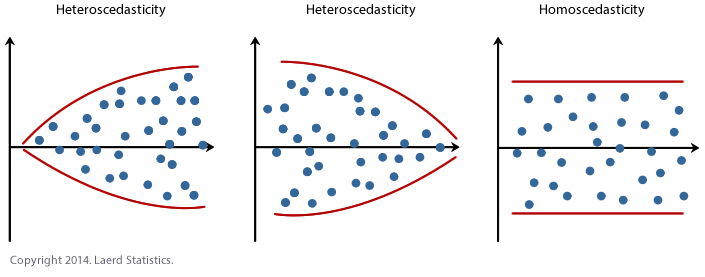
- **OLS Assumption 6:** Error i.e. residual terms- $\epsilon$ should be normally distributed. 
$$ \epsilon = N(0,\sigma^2) $$

## Using the parameters given in 'OLS Regression Results' we can check whether our data adheres to the assumptions made by the model. And if not how we may have to edit the data to make it do so.

- **Assumption 1:** We can check this by plotting scatter graph of and visually see whether the target variable is linear with the features or not. If not we can do feature transformation to make it linear.
- **Assumption 2:** Assumed with the data, can't do anything about it.
- **Assumption 3:** The histogram of residuals has mean= 0.
- **Assumption 4:** Multi-colinearity can be checked in the following ways- **a)** If two features are highly colinear then one would have -ve coefficient even if correlation of both with target variable is +ve. **b)** `Variance Inflation Factor` > 5. **c)** Correlation matrix ($X^T X$) is non invertible i.e. its rank is lower than its dimension.
- **Assumption 5:** Scatterplot- prediction vs residual, and see whether there is a pattern or not. If not, that means that the data is homoscedastic.
- **Assumption 6:** Firstly plot the distribution of residuals, and visually see whether its normal distribution with mean 0. Secondly, we can also draw pp-plot or qq-plot to confirm normality.

**links-**

https://www.youtube.com/watch?v=rw84t7QU2O0&ab_channel=BhaveshBhatt

https://www.youtube.com/watch?v=ATH4urDitI8&list=PLreVlKwe2Z0SXjED8zeDaTMqkvBa-6s-3&index=1&ab_channel=BhaveshBhatt

### The Gauss Markov theorem:
*Says that, under the above conditions, the ordinary least squares (OLS) estimator of the coefficients of a linear regression model is the **best linear unbiased estimator (BLUE)**. That is, it's the estimator which has the smallest variance among those that are unbiased and linear in the observed output variables.*


# Observations of Regression Results-
- $R^2$ value is appx 0.93 which is quite high, so we can say with confidence that our model explains most of the variation of the target feature, in this case the Sale Price of house.
- We have checkeed that Rank of covariance matrix is in fact smaller than the total # of features/columns. Thus we need to get rid of some features/columns which are highly correlated.
- Let's first try to make the correlation matrix ($X^T X $) invertible. In the Correlation Plots we have to get rid of dark blue shaded colored columns.


## Correlation plot of the numerical variables:
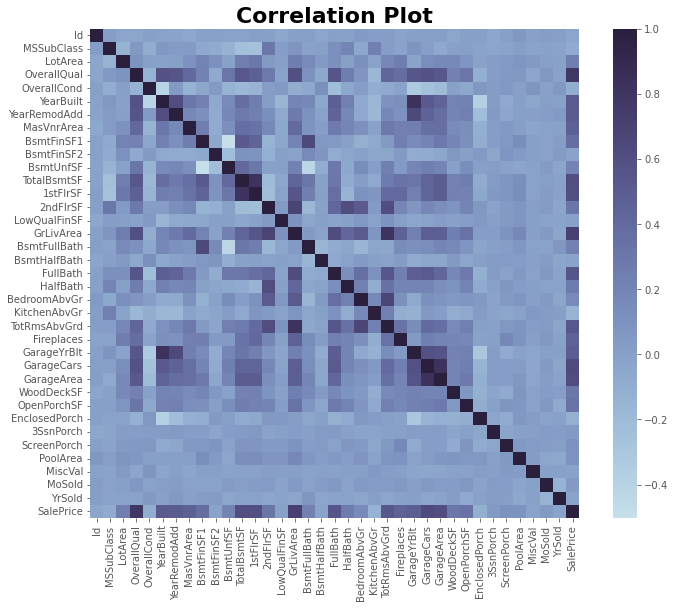

In [152]:
model_train_std1= sm.add_constant(model_train_std)
print(model_train_std1.shape, model_train_std.shape)
est_std_OLS = sm.OLS(predict_train_std, model_train_std1)
est2_std_OLS = est_std_OLS.fit()
print(est2_std_OLS.summary())

(1370, 280) (1370, 279)
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     65.51
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:46:41   Log-Likelihood:                -128.41
No. Observations:                1370   AIC:                             716.8
Df Residuals:                    1140   BIC:                             1918.
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [242]:
#rank of correlation matrix

cov_matrix= np.dot(model_train_std1.T, model_train_std1)
print(f"HEre we can see Rank: {np.linalg.matrix_rank(cov_matrix)} \nDimension: { cov_matrix.shape[0]}" )
print(f"Nllity: {cov_matrix.shape[0] - np.linalg.matrix_rank(cov_matrix)}")
#print(np.linalg.matrix_rank(cov_matrix), cov_matrix.shape)
print("Since rank < dimension we have to discard few features to make it invertible.")

HEre we can see Rank: 230 
Dimension: 280
Nllity: 50
Since rank < dimension we have to discard few features to make it invertible.


In [175]:
model_train_std1

const        Id  MSSubClass   LotArea  OverallQual  OverallCond  \
0       1.0 -1.733076    0.096089 -0.218825     0.608931    -0.538794   
1       1.0 -1.730701   -0.878130 -0.106353    -0.135258     2.236197   
2       1.0 -1.728326    0.096089  0.055020     0.608931    -0.538794   
3       1.0 -1.725951    0.339643 -0.111243     0.608931    -0.538794   
4       1.0 -1.723576    0.096089  0.349403     1.353119    -0.538794   
...     ...       ...         ...       ...          ...          ...   
1365    1.0  1.722643    0.096089 -0.270953    -0.135258    -0.538794   
1366    1.0  1.725018   -0.878130  0.243288    -0.135258     0.386203   
1367    1.0  1.727393    0.339643 -0.160926     0.608931     3.161194   
1368    1.0  1.729769   -0.878130 -0.094910    -0.879446     0.386203   
1369    1.0  1.732144   -0.878130 -0.073394    -0.879446     0.386203   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0      1.029146      0.864397    0.471073    0.548776  ...               0   
1      0.109538     -0.456189   -0.591131    1.141603  ...               0   
2      0.961026      0.815486    0.286813    0.069283  ...               0   
3     -1.968095     -0.749653   -0.591131   -0.519185  ...               0   
4      0.926967      0.717665    1.305662    0.437621  ...               0   
...         ...           ...         ...         ...  ...             ...   
1365   0.892907      0.717665   -0.591131   -0.989960  ...               0   
1366   0.177657      0.130738    0.053779    0.731855  ...               0   
1367  -1.082547      1.011128   -0.591131   -0.390594  ...               0   
1368  -0.776011      0.522022   -0.591131   -0.883164  ...               0   
1369  -0.265118     -0.994206   -0.591131    0.819035  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1365             0             0            1                      0   
1366             0             0            1                      0   
1367             0             0            1                      0   
1368             0             0            1                      0   
1369             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1365                      0                     0                     0   
1366                      0                     0                     0   
1367                      0                     0                     0   
1368                      0                     0                     0   
1369                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1365                     1                      0  
1366      

In [180]:
model_train_std1.loc[:, ~model_train_std1.columns.isin(numeric_columns)].shape

(1370, 244)

In [181]:
numeric_columns.shape

(37,)

### We can see a few dark non-diagonal terms in the Correlation plot, we have to get rid of them

Text(0.5, 1.0, 'Correlation Plot of Caltegorical columns')

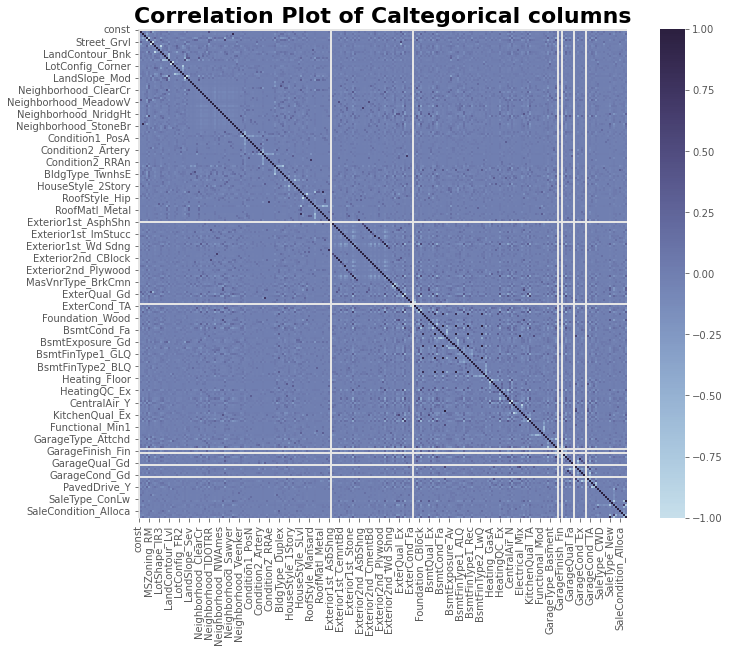

In [189]:
corr_01 = model_train_std1.loc[:, ~model_train_std1.columns.isin(numeric_columns)].corr() #Exclude numerical columns
corr_01
f, ax = plt.subplots(figsize=(12, 9))
cmap= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(corr_01, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot of Caltegorical columns", weight= 'bold', size= 22)

### Creating data with ( drop_first= True )

[1 0] 



(array([  6.,   2.,   0.,   9.,   3.,   2.,  28.,   5.,   4.,  35.,  31.,
         21.,  67.,  42.,  69.,  38.,  10.,  29.,  83.,   6.,  29.,  94.,
         78.,  98., 121., 133., 108., 111.,  94., 151.,  78.,  23.,  42.,
         41.,  77., 101., 181., 161., 368., 178.]),
 array([-3.12560034, -3.01587622, -2.9061521 , -2.79642797, -2.68670385,
        -2.57697973, -2.46725561, -2.35753149, -2.24780737, -2.13808325,
        -2.02835913, -1.91863501, -1.80891089, -1.69918677, -1.58946265,
        -1.47973853, -1.37001441, -1.26029029, -1.15056617, -1.04084205,
        -0.93111793, -0.82139381, -0.71166969, -0.60194556, -0.49222144,
        -0.38249732, -0.2727732 , -0.16304908, -0.05332496,  0.05639916,
         0.16612328,  0.2758474 ,  0.38557152,  0.49529564,  0.60501976,
         0.71474388,  0.824468  ,  0.93419212,  1.04391624,  1.15364036,
         1.26336448]),
 <BarContainer object of 40 artists>)

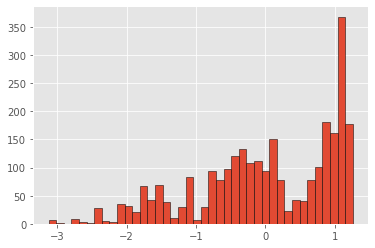

In [226]:
model_2_df= pd.get_dummies(full_df, drop_first= True)
scaler = StandardScaler()
scaled_2_data= copy.deepcopy(model_2_df)
scaled_2_data[numeric_columns]= scaler.fit_transform(scaled_2_data[numeric_columns])
print(scaled_2_data['SaleType_WD'].unique(), '\n' )

#Data is checked, it's alright!!
plt.hist(scaled_2_data['YearBuilt'], bins= 40, edgecolor= 'k')

In [231]:
scaled_2_data.columns.shape

(242,)

In [237]:
#Splitting standardized data into test & train
model_2_train_std= copy.deepcopy(scaled_2_data.iloc[0:train_df.shape[0],:].loc[:, scaled_2_data.columns!='SalePrice'])
predict_2_train_std= copy.deepcopy(scaled_2_data.iloc[0:train_df.shape[0],:]["SalePrice"])
model_2_test_std= copy.deepcopy(scaled_2_data.iloc[train_df.shape[0]:,:].loc[:, scaled_2_data.columns!='SalePrice'])
predict_2_test_std= copy.deepcopy(scaled_2_data.iloc[train_df.shape[0]:,:]["SalePrice"])

print("model_2_train_std:\t", model_2_train_std.shape)
print("predict_2_train_std:\t",predict_2_train_std.shape)
print("model_2_test_std:\t",model_2_test_std.shape)
print("predict_2_test_std:\t",predict_2_test_std.shape)

print(f"\nNOTE: # of features= 241 (< 279)")

model_2_train_std:	 (1370, 241)
predict_2_train_std:	 (1370,)
model_2_test_std:	 (1387, 241)
predict_2_test_std:	 (1387,)

NOTE: # of features= 241 (< 279)


Text(0.5, 1.0, 'Correlation Plot of Categorical columns')

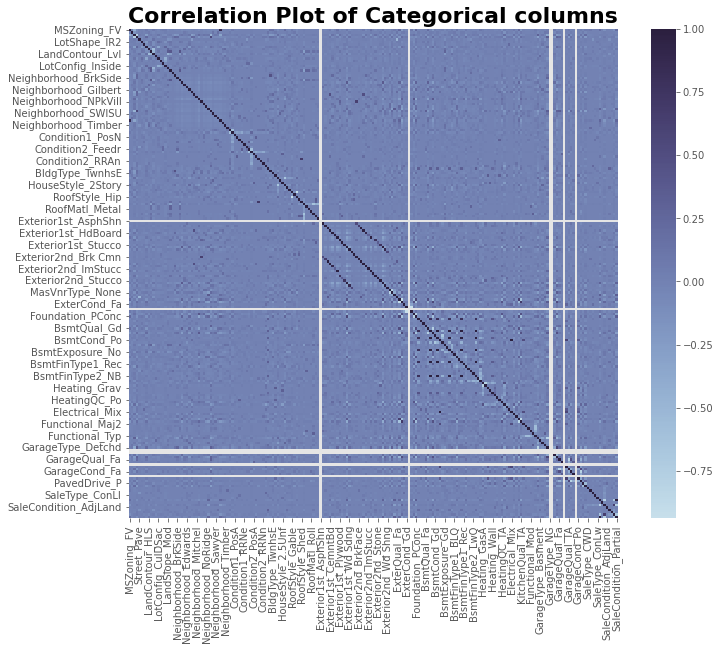

In [321]:
corr_02 = model_2_train_std.loc[:, ~model_2_train_std.columns.isin(numeric_columns)].corr() #Exclude numerical columns
corr_02
f, ax = plt.subplots(figsize=(12, 9))
cmap= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(corr_02, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot of Categorical columns", weight= 'bold', size= 22)

In [397]:
#rank of correlation matrix
def correlation_matrix(cov_matrix2):
    cov_matrix2 = np.dot(model_2_train_std.T, model_2_train_std)
    print(f"Rank: {np.linalg.matrix_rank(cov_matrix2)} \nDimension: { cov_matrix2.shape[0]}" )
    print(f"Nullity: {cov_matrix2.shape[0] - np.linalg.matrix_rank(cov_matrix2)}")
    return cov_matrix2

In [270]:
A= "A"
B= "B"
A+B

'AB'

In [330]:
Exterior1st_categories= ('Exterior1st_' + train_df[['Exterior1st']].apply(lambda col: col.unique())).to_numpy()[:,0]
print(Exterior1st_categories)
len_Exterior1st_categories= np.arange(len(Exterior1st_categories))
for i in range(len(Exterior1st_categories)):
    if (Exterior1st_categories[i]== 'Exterior1st_AsbShng'):
        del_index= i
        print(i, '\n\n')
    Exterior1st_categories_del= np.delete(Exterior1st_categories, del_index)
print("After Deletion [Exterior1st_categories_del]: \n", Exterior1st_categories_del)

['Exterior1st_VinylSd' 'Exterior1st_MetalSd' 'Exterior1st_Wd Sdng'
 'Exterior1st_HdBoard' 'Exterior1st_BrkFace' 'Exterior1st_WdShing'
 'Exterior1st_CemntBd' 'Exterior1st_Plywood' 'Exterior1st_Stucco'
 'Exterior1st_AsbShng' 'Exterior1st_BrkComm' 'Exterior1st_Stone'
 'Exterior1st_ImStucc' 'Exterior1st_CBlock']
9 


After Deletion [Exterior1st_categories_del]: 
 ['Exterior1st_VinylSd' 'Exterior1st_MetalSd' 'Exterior1st_Wd Sdng'
 'Exterior1st_HdBoard' 'Exterior1st_BrkFace' 'Exterior1st_WdShing'
 'Exterior1st_CemntBd' 'Exterior1st_Plywood' 'Exterior1st_Stucco'
 'Exterior1st_BrkComm' 'Exterior1st_Stone' 'Exterior1st_ImStucc'
 'Exterior1st_CBlock']


In [339]:
model_2_train_std= model_2_train_std.loc[:, ~model_2_train_std.columns.isin(Exterior1st_categories_del)]
model_2_train_std.head()

Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0 -1.737246    0.071269 -0.217852     0.614435     -0.53297   1.028840   
1 -1.736057   -0.876811 -0.072532    -0.114480      2.23252   0.124244   
2 -1.734869    0.071269  0.135971     0.614435     -0.53297   0.961833   
3 -1.733681    0.308289 -0.078850     0.614435     -0.53297  -1.919473   
4 -1.732493    0.071269  0.516330     1.343350     -0.53297   0.928329   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0      0.886203    0.491576    0.550634   -0.298148  ...               0   
1     -0.417643   -0.583739    1.145700   -0.298148  ...               0   
2      0.837913    0.305042    0.069331   -0.298148  ...               0   
3     -0.707386   -0.583739   -0.521360   -0.298148  ...               0   
4      0.741332    1.336467    0.439059   -0.298148  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 228 columns]

In [399]:
def cov_mat(X):
    cov_matrix2 = np.dot(X.T, X)
    print(f"Rank: {np.linalg.matrix_rank(cov_matrix2)} \nDimension: { cov_matrix2.shape[0]}" )
    print(f"Nullity: {cov_matrix2.shape[0] - np.linalg.matrix_rank(cov_matrix2)}")
    return cov_matrix2


In [350]:
model_2_train_std= model_2_train_std.loc[:, ~model_2_train_std.columns.isin(['TotalBsmtSF', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFullBath', 'FullBath'])]
model_2_train_std.head()

Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0 -1.737246    0.071269 -0.217852     0.614435     -0.53297   1.028840   
1 -1.736057   -0.876811 -0.072532    -0.114480      2.23252   0.124244   
2 -1.734869    0.071269  0.135971     0.614435     -0.53297   0.961833   
3 -1.733681    0.308289 -0.078850     0.614435     -0.53297  -1.919473   
4 -1.732493    0.071269  0.516330     1.343350     -0.53297   0.928329   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0      0.886203    0.491576    0.550634   -0.298148  ...               0   
1     -0.417643   -0.583739    1.145700   -0.298148  ...               0   
2      0.837913    0.305042    0.069331   -0.298148  ...               0   
3     -0.707386   -0.583739   -0.521360   -0.298148  ...               0   
4      0.741332    1.336467    0.439059   -0.298148  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 222 columns]

In [356]:
model_2_train_std= model_2_train_std.loc[:, ~model_2_train_std.columns.isin(['Id'])]

MSSubClass               1
LotArea                  1
OverallQual              1
OverallCond              1
YearBuilt                1
                        ..
SaleCondition_AdjLand    1
SaleCondition_Alloca     1
SaleCondition_Family     1
SaleCondition_Normal     1
SaleCondition_Partial    2
Length: 221, dtype: int64

In [372]:
high_corr_colms= (model_2_train_std.corr()>0.7).sum()
high_corr_colms.loc[high_corr_colms>1].index


Index(['2ndFlrSF', 'KitchenAbvGr', 'MSZoning_FV', 'Neighborhood_Somerst',
       'Condition2_RRAe', 'BldgType_Duplex', 'HouseStyle_2Story',
       'RoofStyle_Shed', 'Foundation_Slab', 'BsmtQual_NB', 'BsmtCond_NB',
       'BsmtCond_Po', 'BsmtExposure_NB', 'BsmtFinType1_NB', 'BsmtFinType2_NB',
       'Electrical_Mix', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

[[ 0.07126935 -0.21785156  0.61443522 ...  0.          0.
   1.        ]
 [-0.87681068 -0.07253169 -0.11447954 ...  0.          0.
   1.        ]
 [ 0.07126935  0.13597073  0.61443522 ...  0.          0.
   1.        ]
 ...
 [ 0.30828935 -0.14304342  0.61443522 ...  0.          0.
   1.        ]
 [-0.87681068 -0.05774697 -0.8433943  ...  0.          0.
   1.        ]
 [-0.87681068 -0.02994665 -0.8433943  ...  0.          0.
   1.        ]]
Rank: 197 
Dimension: 203
Nullity: 6


Text(0.5, 1.0, 'Correlation Plot')

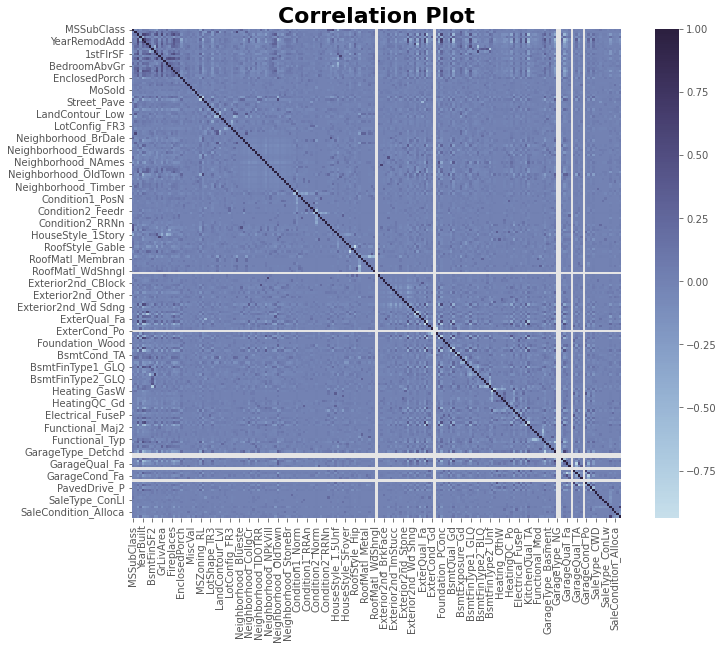

In [401]:
model_2_train_std= model_2_train_std.loc[:, ~model_2_train_std.columns.isin(high_corr_colms.loc[high_corr_colms>1].index)]
model_2_train_std.head()
np_sadkfn= model_2_train_std.to_numpy()
print(np_sadkfn)

corr_matrxx= cov_mat(model_2_train_std)

cor_mat= model_2_train_std.corr()
f, ax = plt.subplots(figsize=(12, 9))
cmap= sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(corraltn_matrix, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot", weight= 'bold', size= 22)


In [413]:
(model_2_train_std.corr()>0.6).sum()

MSSubClass               1
LotArea                  1
OverallQual              1
OverallCond              1
YearBuilt                3
                        ..
SaleType_WD              2
SaleCondition_AdjLand    1
SaleCondition_Alloca     1
SaleCondition_Family     1
SaleCondition_Normal     2
Length: 203, dtype: int64

In [608]:
class OLS_report(object):
    
    def __init__(self, Xtrain, Ytrain):
        self.Xtrain= Xtrain
        self.Ytrain= Ytrain
        self.Xtrain1 = sm.add_constant(Xtrain)
        
        #model= sm.OLS(Ytrain, Xtrain1)
        #results= model.fit()
        #self.params= results.params
        print("Inside __init__")
        
    def x_train_1(self):
        return self.Xtrain1
    
    def parameters(self):
        model= sm.OLS(self.Ytrain, self.Xtrain1)
        results= model.fit()
        return results.params
    
    def y_predict(self):
        return np.dot(self.Xtrain1, self.parameters())
    
    def residue(self):
        return np.dot(self.Xtrain1, self.parameters())- self.Ytrain
    
    def var_inflation_factor(self):
        vif_data = pd.DataFrame()
        vif_data["Features"]= self.Xtrain1.columns
        vif_data["VIF"]= [variance_inflation_factor(self.Xtrain1.values, i) for i in range(len(self.Xtrain1.columns))]
        return vif_data

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Inside __init__


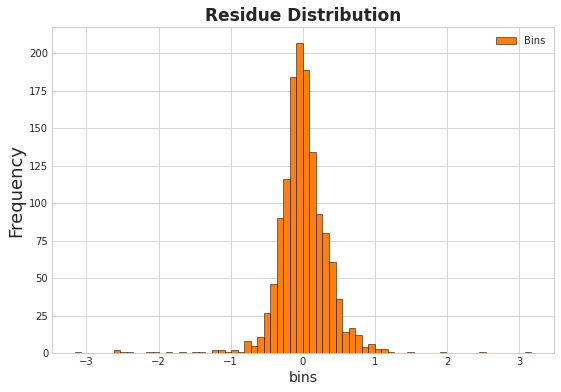

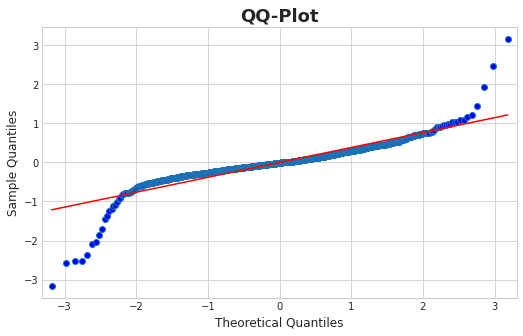

In [640]:
ols_1= OLS_report(model_2_train_std, predict_2_train_std)

with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize= (9, 6))
    plt.hist(ols_1.residue(), bins= 70, color= 'tab:orange', edgecolor= 'k', label= 'Bins')
    plt.title("Residue Distribution", weight= 'bold', size= 17)
    plt.xlabel("bins", size= 14)
    plt.ylabel("Frequency", size= 18)
    plt.legend()
    
    fig, ax1 = plt.subplots(figsize= (8.5,5))
    pplot = sm.ProbPlot(ols_1.residue())
    fig = pplot.qqplot(line='s', color= 'tab:blue', ax= ax1) 
    plt.title("QQ-Plot", weight= "bold", size= 18)

### From the plot above we can see the residues are fairly well approximated by Normal Distribution.! Except a bit tail heavy, not an issue ignore it.

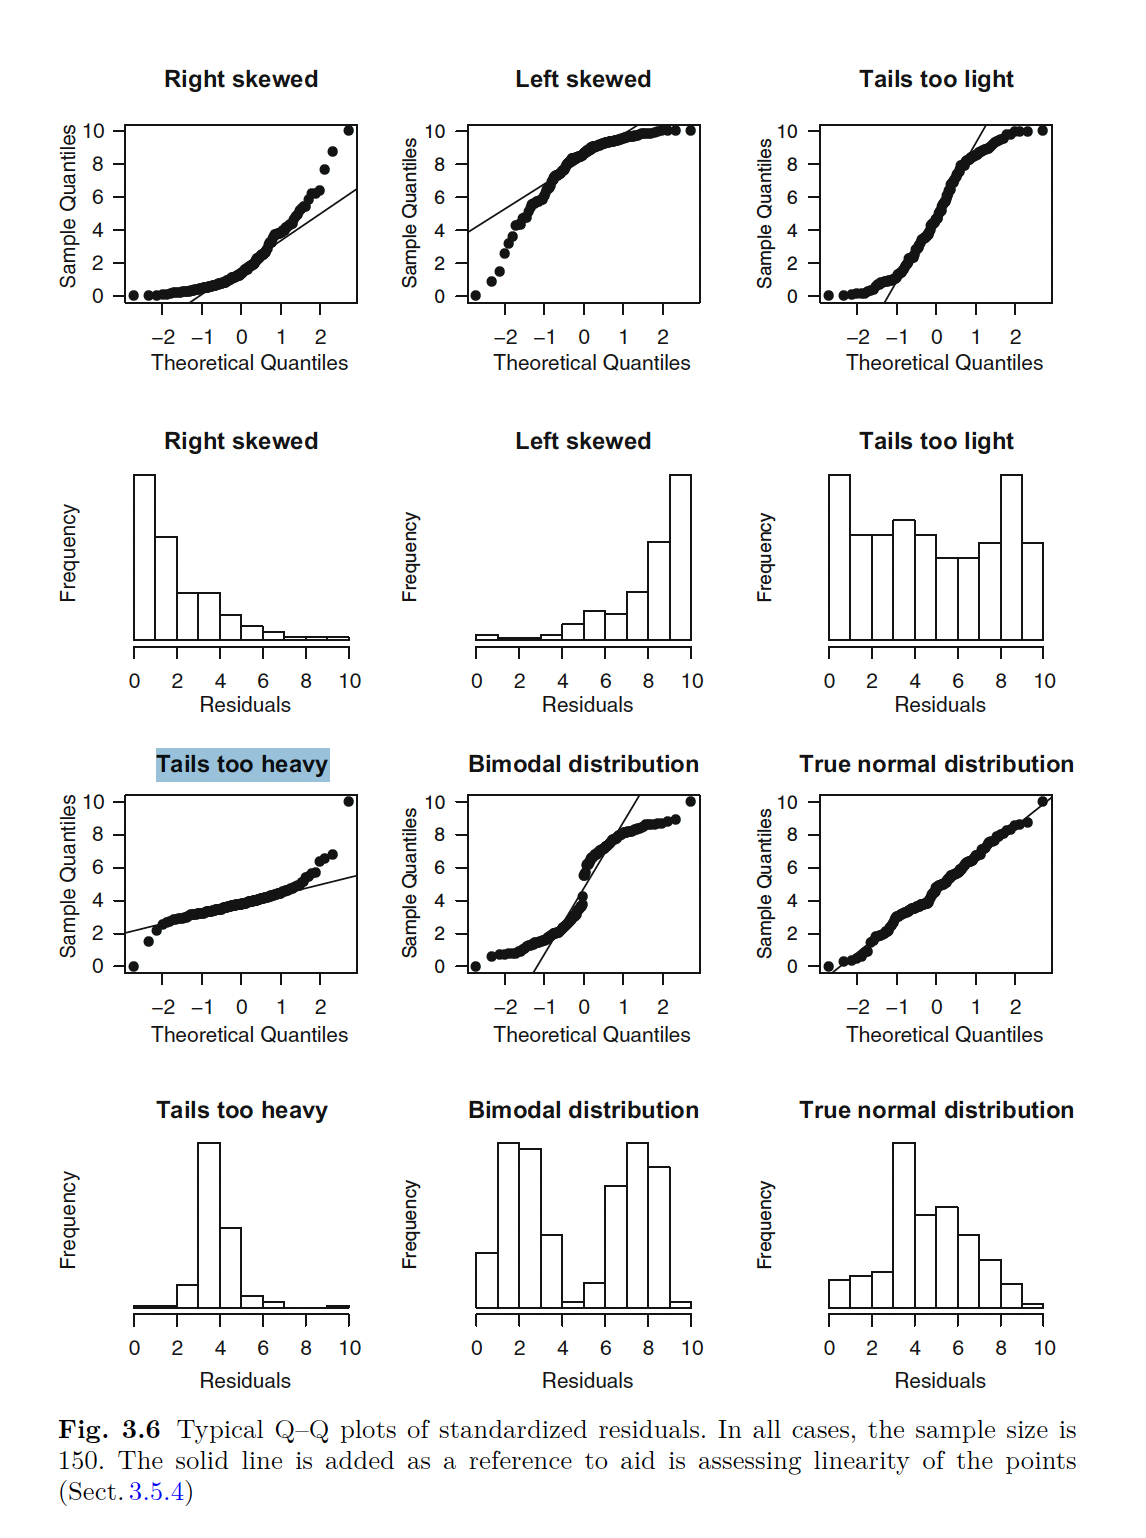

### From the graph below we can see the residue has no as such dependene on on predicted output

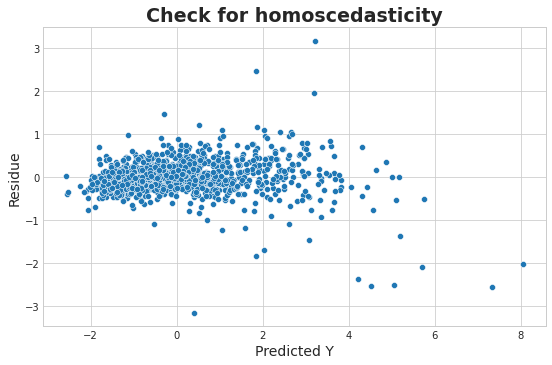

In [647]:
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots(figsize= (9,5.5))
    _ = ax.scatter(ols_1.y_predict(), ols_1.residue(), color= 'tab:blue', edgecolor= 'white')
    ax.set_xlabel("Predicted Y", size= 14)
    ax.set_ylabel("Residue", size= 14)
    ax.set_title("Check for homoscedasticity", weight= 'bold', size= 19)

In [ ]:
vif= [variance_inflation_factor(X)]

In [613]:
VIF= ols_1.var_inflation_factor()

In [648]:
print(VIF.to_string())

                  Features          VIF
0                    const  8804.414896
1               MSSubClass    18.651642
2                  LotArea     3.084122
3              OverallQual     5.298752
4              OverallCond     2.507744
5                YearBuilt    14.476401
6             YearRemodAdd     3.651016
7               MasVnrArea     2.920403
8               BsmtFinSF1    11.009492
9               BsmtFinSF2     4.157859
10               BsmtUnfSF     9.573478
11                1stFlrSF    16.127537
12            LowQualFinSF     1.974756
13               GrLivArea    17.329417
14            BsmtHalfBath     1.258288
15                HalfBath     2.517148
16            BedroomAbvGr     2.690329
17              Fireplaces     1.978807
18              GarageArea     2.672220
19              WoodDeckSF     1.453579
20             OpenPorchSF     1.613009
21           EnclosedPorch     1.520764
22               3SsnPorch     1.202157
23             ScreenPorch     1.319032


In [656]:
del_col= ['1stFlrSF', 'BsmtFinSF2', 'RoofStyle_Gable',  'ExterCond_TA', 'MSZoning_RM', 'GarageType_Attchd']
model_2_train_std= model_2_train_std.drop(columns= del_col)

In [657]:
model_2_train_std1= sm.add_constant(model_2_train_std)
model= sm.OLS(predict_2_train_std, model_2_train_std1)
results= model.fit()

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [659]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     73.89
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:42:34   Log-Likelihood:                -637.27
No. Observations:                1370   AIC:                             1659.
Df Residuals:                    1178   BIC:                             2661.
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -12.57

In [660]:
cov_mat(model_2_train_std1)

Rank: 192 
Dimension: 198
Nullity: 6


array([[ 1.37000000e+03, -3.04703102e+01,  8.88885455e+01, ...,
         1.00000000e+01,  2.00000000e+01,  1.13200000e+03],
       [-3.04703102e+01,  1.29814835e+03, -2.33236965e+02, ...,
         4.03097354e+00,  1.21776873e-01, -6.54646333e+00],
       [ 8.88885455e+01, -2.33236965e+02,  2.29285197e+03, ...,
        -9.11452689e-01, -1.44039821e+00,  7.85021505e+01],
       ...,
       [ 1.00000000e+01,  4.03097354e+00, -9.11452689e-01, ...,
         1.00000000e+01,  0.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+01,  1.21776873e-01, -1.44039821e+00, ...,
         0.00000000e+00,  2.00000000e+01,  0.00000000e+00],
       [ 1.13200000e+03, -6.54646333e+00,  7.85021505e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.13200000e+03]])

In [667]:
del_col= ['BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'YrSold', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'ExterQual_Fa', 'ExterCond_Fa', 'Foundation_CBlock', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtExposure_Mn', 'BsmtFinType1_LwQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_Rec', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_SBrkr', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_NG', 'GarageFinish_Unf', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal']
model_2_train_std= model_2_train_std.drop(columns= del_col)

In [668]:
model_2_train_std.shape

(1370, 111)

In [669]:
model_2_train_std1= sm.add_constant(model_2_train_std)
model= sm.OLS(predict_2_train_std, model_2_train_std1)
results= model.fit()

/Users/ritobrotomohanta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [671]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.9
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:13:37   Log-Likelihood:                -677.40
No. Observations:                1370   AIC:                             1569.
Df Residuals:                    1263   BIC:                             2128.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.8055 

In [672]:
cov_mat(model_2_train_std1)

Rank: 107 
Dimension: 112
Nullity: 5


array([[1370.        ,  -30.47031018,   88.88854552, ...,   28.        ,
        1284.        , 1188.        ],
       [ -30.47031018, 1298.14835446, -233.23696526, ...,   -4.5225085 ,
         -27.82973365,  -16.89509036],
       [  88.88854552, -233.23696526, 2292.85197277, ...,    5.28577847,
          75.15388732,   76.55143131],
       ...,
       [  28.        ,   -4.5225085 ,    5.28577847, ...,   28.        ,
           0.        ,   28.        ],
       [1284.        ,  -27.82973365,   75.15388732, ...,    0.        ,
        1284.        , 1104.        ],
       [1188.        ,  -16.89509036,   76.55143131, ...,   28.        ,
        1104.        , 1188.        ]])

In [673]:
model_2_train_std1.columns

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_NG', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_WD'],
      dtype='object', length=112)

# -------------------------------------------------------------------------------------------

# Deploying 'Ridge Regression' model

In Rigde Regression we modify the loss function of Linear Regression:
$$ L := \frac{1}{n}(Y-X\beta)^T (Y-X\beta) + \frac{\lambda}{n}|| \beta ||^2 $$

This can equivalently be posed as a contraint optimization problem on Linear Regression-

- **Optimize:** $ L := \frac{1}{n}(Y-X\beta)^T (Y-X\beta) $
- **Constraint:** $ ||\beta ||^2 \leq C $

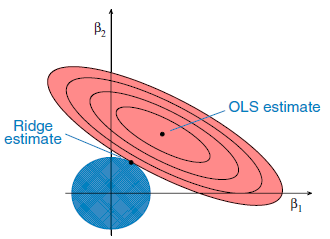

**Solving the above we get the estimate of coefficients:**
$$ \hat{\beta}_\lambda = (X^TX+\lambda I)^{-1} X^TY $$
$$ E[\hat{\beta}_\lambda] = (X^TX+\lambda I)^{-1} X^TX\beta $$

The Ridge Regression brings in some bias in the estimation (unlike OLS which is unbiased), but this in return reduces the variance of the estimator. 

# Advantagez of Ridge Regression. 
 1. Ordinary Regression faces problem if there is multi-collinearity present in the features, the covariance matrix $X^TX$ is not invertible. But in Ridge Regression, we don't invert $X^TX$, instead we invert $(X^TX+\lambda I)$. Thus it is much more suitable if we have multi-collinearity present in our data. This can be especially useful in case of high dimensional data where the features are more than the number of data points.
 2. Ridge regression belongs to a class of regression tools that use L2 regularization. The other type of regularization, L1 regularization, limits the size of the coefficients by adding an L1 penalty equal to the absolute value of the magnitude of coefficients, called Lasso Regression. 

#### In our data we have multi-colinearity present- Nullity(X^T X) > 0, therefore I think Ridge Regression might work better. Let's see-